In [1]:
# We have to help of Farmers for optimize Agicultural production so in this we will build a predictive model who tells us for given soil and claimetic condition which crops farmers should grow or which crops will best 

In [2]:
#Problem Statement: Build a prediction model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions
  #  Goal: Achieve Precision farming by optimizing the Agricultual Production

In [81]:
#for manipulation
import pandas as pd
import numpy as np

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for interactivity
from ipywidgets import interact

In [82]:
#Lets read the dataset
data=pd.read_csv('crop.csv')

In [83]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [84]:
#Lets check the total no of rows and columns in the dataset
data.shape

(2200, 8)

In [85]:
#lets check the head o the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [86]:
#lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [87]:
#if missing value found then replace missing value with mean
#if outliers the replace with medium
#if value is categorical the replace with mode

In [88]:
#Lets check the crops present in the dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [231]:

data=data.rename({'N':'Nitrogen','P':'Phosphorous','K':'Potassium'},axis=1,inplace=True)


In [234]:
data

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [236]:
#Lets check the summary for all the crops
print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(data['Nitrogen'].mean()))
print("Average Ratio of Phosphorous in the soil: {0:.2f}".format(data['Phosphorous'].mean()))
print("Average Ratio of Potassium in the soil: {0:.2f}".format(data['Potassium'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value Of the soil: {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.55
Average Ratio of Phosphorous in the soil: 53.36
Average Ratio of Potassium in the soil: 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value Of the soil: 6.47
Average Rainfall in mm: 103.46


In [237]:
data.describe()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [239]:
#lets check the summary statistics for each of the crops
@interact
def summary(crops=list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print("-------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :",x['Nitrogen'].min())
    print("Average Nitrogen required :",x['Nitrogen'].mean())
    print("Maximum Nitrogen required :",x['Nitrogen'].max())
    print("-------------------------------")  
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :",x['Phosphorous'].min())
    print("Average Phosphorous required :",x['Phosphorous'].mean())
    print("Maximum Phosphorous required :",x['Phosphorous'].max())
    print("-------------------------------")  
    print("Statistics for Potassium")
    print("Minimum Potassium required :",x['Potassium'].min())
    print("Average Potassium required :",x['Potassium'].mean())
    print("Maximum Potassium required :",x['Potassium'].max())
    print("-------------------------------")   
    print("Statistics for temperature") 
    print("Minimum temperature required :{0:.2f}".format(x['temperature'].min()))
    print("Average temperature required :{0:.2f}".format(x['temperature'].mean()))
    print("Maximum temperature required :{0:.2f}".format(x['temperature'].max()))
    print("-------------------------------")  
    print("Statistics for PH value") 
    print("Minimum ph value required :{0:.2f}".format(x['ph'].min()))
    print("Average ph value required :{0:.2f}".format(x['ph'].mean()))
    print("Maximum ph value required :{0:.2f}".format(x['ph'].max()))
    print("-------------------------------")  
    print("Statistics for Rainfall")
    print("Minimum Rainfall required :{0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required :{0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required :{0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [307]:
   # for i in data['label']:
        #if(i==data['label'].unique()):
          #  print(":{0:.2f}".format(data[data['label'].unique()][conditions].mean()))
            #else:
                #i++            
            #print(i,data[conditions].mean())

@interact
def summary(conditions=(data.columns)):
    print("Average",conditions,"is:{0:.2f}".format(data[conditions].mean()))
    print("Rice:{0:.2f}".format(data[(data['label']=='rice')][conditions].mean()))
    print("Maize:{0:.2f}".format(data[(data['label']=='maize')][conditions].mean()))
    print("Chickpea:{0:.2f}".format(data[(data['label']=='chickpea')][conditions].mean()))
    print("kidneybeans:{0:.2f}".format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print("Pigeonpeas:{0:.2f}".format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print("Mothbeans:{0:.2f}".format(data[(data['label']=='mothbeans')][conditions].mean()))
    print("Mungbean:{0:.2f}".format(data[(data['label']=='mungbean')][conditions].mean()))
    print("Blackgram:{0:.2f}".format(data[(data['label']=='blackgram')][conditions].mean()))
    print("Lentil:{0:.2f}".format(data[(data['label']=='lentil')][conditions].mean()))
    print("Pomegranate:{0:.2f}".format(data[(data['label']=='pomegranate')][conditions].mean()))
    print("Banana:{0:.2f}".format(data[(data['label']=='banana')][conditions].mean()))
    print("Mango:{0:.2f}".format(data[(data['label']=='mango')][conditions].mean()))
    print("Grapes:{0:.2f}".format(data[(data['label']=='grapes')][conditions].mean()))
    print("Watermelon:{0:.2f}".format(data[(data['label']=='watermelon')][conditions].mean()))
    print("Muskmelon:{0:.2f}".format(data[(data['label']=='muskmelon')][conditions].mean()))
    print("Apple:{0:.2f}".format(data[(data['label']=='apple')][conditions].mean()))
    print("Orange:{0:.2f}".format(data[(data['label']=='orange')][conditions].mean()))
    print("Papaya:{0:.2f}".format(data[(data['label']=='papaya')][conditions].mean()))
    print("Coconut:{0:.2f}".format(data[(data['label']=='coconut')][conditions].mean()))
    print("Cotton:{0:.2f}".format(data[(data['label']=='cotton')][conditions].mean()))
    print("Jute:{0:.2f}".format(data[(data['label']=='jute')][conditions].mean()))
    print("cofee:{0:.2f}".format(data[(data['label']=='coffee')][conditions].mean()))


interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorous', 'Potassium', 'tem…

In [308]:
@interact
def summary(conditions=(data.columns)):
    print("Crops which require greater than average",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("--------------------------------")
    print("Crops which require greater than average",conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())
    

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorous', 'Potassium', 'tem…

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

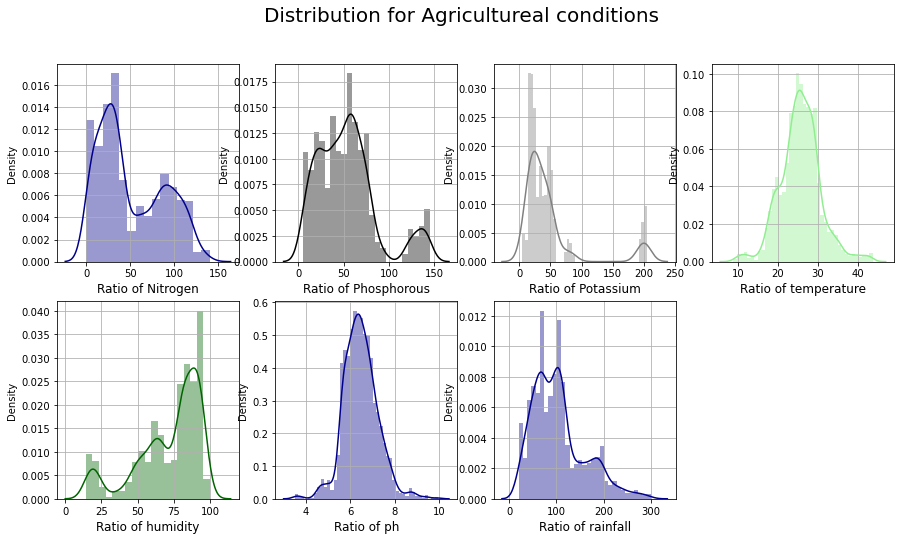

In [350]:
plt.figure(figsize = (15, 8))
plt.subplot(2,4,1)
sns.distplot(data['Nitrogen'],color='darkblue')
plt.xlabel('Ratio of Nitrogen',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['Phosphorous'],color='black')
plt.xlabel('Ratio of Phosphorous',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['Potassium'],color='gray')
plt.xlabel('Ratio of Potassium',fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'],color='lightgreen')
plt.xlabel('Ratio of temperature',fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'],color='darkgreen')
plt.xlabel('Ratio of humidity',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'],color='darkblue')
plt.xlabel('Ratio of ph',fontsize=12)
plt.grid()


plt.subplot(2,4,7)
sns.distplot(data['rainfall'],color='darkblue')
plt.xlabel('Ratio of rainfall',fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agricultureal conditions',fontsize=20)
plt.show()

In [351]:
#lets understand which crops can only be grown in summer season,winter and Rainy season
print("Summer Season")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("-------------------------")
print("Winter Season")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("-------------------------")
print("Rainy Season")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Season
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------
Winter Season
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------
Rainy Season
['rice' 'papaya' 'coconut']


In [383]:
from sklearn.cluster import KMeans

In [384]:
#remove the label column becaue this is unsupervised ML algo so we dont need any label
x=data.drop(['label'],axis=1)

In [385]:
x.values

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [386]:
x.shape

(2200, 7)

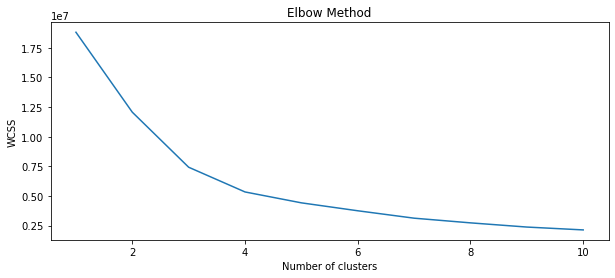

In [387]:
#If we got two elbow then take last one
plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    #km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [388]:
#lets implement the K Means Algorithm to perform clustering analysis
km=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

#Lets find out the Results
a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns={0:'cluster'})

#lets check the cluster of each crops
print("Lets check the results After Applying the K Means Clustring Analysis\n")
print("Crops in First Cluster:",z[z['cluster']==0]['label'].unique())
print("-----------------------")
print("Crops in Second Cluster:",z[z['cluster']==1]['label'].unique())
print("-----------------------")
print("Crops in Thired Cluster:",z[z['cluster']==2]['label'].unique())
print("-----------------------")
print("Crops in Fourth Cluster:",z[z['cluster']==3]['label'].unique())

Lets check the results After Applying the K Means Clustring Analysis

Crops in First Cluster: ['grapes' 'apple']
-----------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
-----------------------
Crops in Thired Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
-----------------------
Crops in Fourth Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [389]:
#Logistic Regression It performs best result for multiple class

In [390]:
#Lets split the dataset for predictive Modeling
y=data['label']
x=data.drop(['label'],axis=1)

print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [393]:
#lets create Training and Testing sets for validation of Results
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("The Shape of x train:",x_train.shape)
print("The Shape of x test:",x_test.shape)
print("The Shape of y train:",y_train.shape)
print("The Shape of y test:",y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [395]:
#lets create a predictive model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


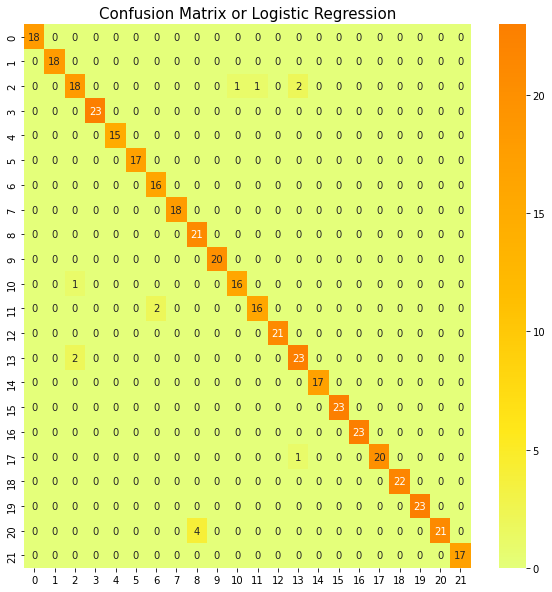

In [397]:
#lets evaluate the Model performance

from sklearn.metrics import confusion_matrix

#lets print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix or Logistic Regression',fontsize=15)
plt.show()

In [401]:
from sklearn.metrics import classification_report
#Lets print the Classification Report also
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [405]:
prediction=model.predict((np.array([[90,42,43,20,82,6,202]])))
print("The Suggested Crop fot given Climatic Condition is:",prediction)

The Suggested Crop fot given Climatic Condition is: ['rice']
